# Hypothyroid Prediction Project

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Metric of Sucess : Model that has an accuracy of > 80%

Importing the necessary Libraries

In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error, mean_absolute_error

In [65]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Loading and checking the data

In [3]:
hypothyroid_df =  pd.read_csv('hypothyroid.csv',na_values = "?")

In [4]:
hypothyroid_df.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


In [5]:
hypothyroid_df.shape

(3163, 26)

In [6]:
hypothyroid_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [7]:
hypothyroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [8]:
# Description of the quantitative columns
hypothyroid_df.describe()


,age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000,260.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771,31.283077
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572,19.224659
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000,21.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000,28.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000,34.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


In [9]:
# Description of the qualitative columns

hypothyroid_df.describe(include = 'object')

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
count,3163,3090,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,negative,F,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y,n
freq,3012,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,2468,2914,2915,2916,2903


# Data Cleaning and Preparation

In [10]:
#Checking for null values
hypothyroid_df.isna().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [11]:
#Imputing Age with mean

hypothyroid_df['age'] = hypothyroid_df['age'].fillna(hypothyroid_df['age'].mean())

In [12]:
#Imputing sex with the mode
hypothyroid_df['sex']=hypothyroid_df['sex'].fillna(hypothyroid_df['sex'].mode()[0])


In [13]:
#Imputing with mean

hypothyroid_df['TSH'] = hypothyroid_df['TSH'].fillna(hypothyroid_df['TSH'].mean())
hypothyroid_df['T3'] = hypothyroid_df['T3'].fillna(hypothyroid_df['T3'].mean())
hypothyroid_df['TT4'] = hypothyroid_df['TT4'].fillna(hypothyroid_df['TT4'].mean())
hypothyroid_df['T4U'] = hypothyroid_df['T4U'].fillna(hypothyroid_df['T4U'].mean())
hypothyroid_df['FTI'] = hypothyroid_df['FTI'].fillna(hypothyroid_df['FTI'].mean())

In [14]:
# Dropping TBG because it has too many missing values.
#Dropping 'TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured'
hypothyroid_df = hypothyroid_df.drop(['TBG_measured', 'TBG','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured'], axis = 1)

In [15]:
hypothyroid_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


In [16]:
#Checking for anomalies in the data
for column in hypothyroid_df:
    unique_vals = np.unique(hypothyroid_df[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature status :2 -- ['hypothyroid' 'negative']
The number of values for feature age :93
The number of values for feature sex :2 -- ['F' 'M']
The number of values for feature on_thyroxine :2 -- ['f' 't']
The number of values for feature query_on_thyroxine :2 -- ['f' 't']
The number of values for feature on_antithyroid_medication :2 -- ['f' 't']
The number of values for feature thyroid_surgery :2 -- ['f' 't']
The number of values for feature query_hypothyroid :2 -- ['f' 't']
The number of values for feature query_hyperthyroid :2 -- ['f' 't']
The number of values for feature pregnant :2 -- ['f' 't']
The number of values for feature sick :2 -- ['f' 't']
The number of values for feature tumor :2 -- ['f' 't']
The number of values for feature lithium :2 -- ['f' 't']
The number of values for feature goitre :2 -- ['f' 't']
The number of values for feature TSH :240
The number of values for feature T3 :70
The number of values for feature TT4 :269
The number of values for

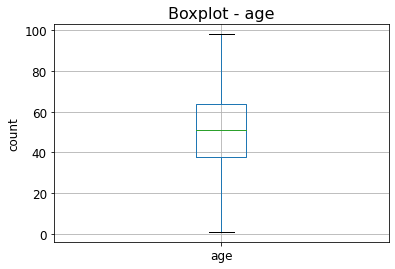

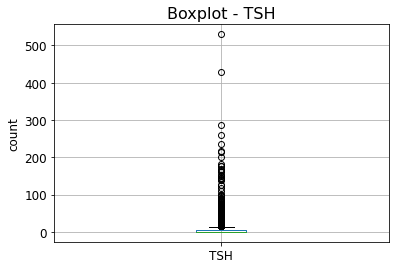

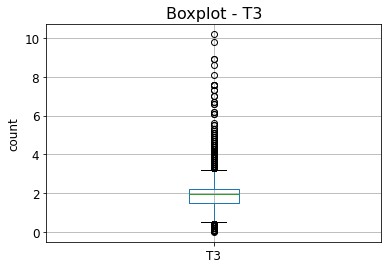

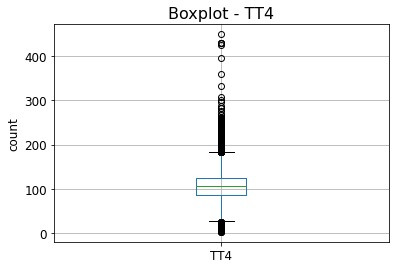

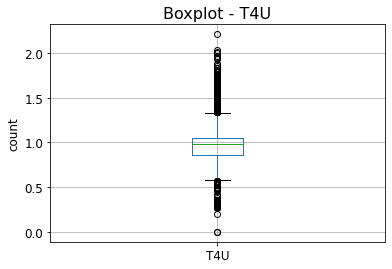

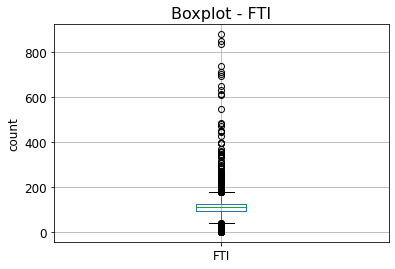

In [17]:
#Checking for Outliers
cols = ['age','TSH', 'T3', 'TT4','T4U','FTI']

for column in cols:
    plt.figure()
    hypothyroid_df.boxplot([column], fontsize= 12)
    plt.ylabel('count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)


In [18]:


# Determining how many rows would be lost if outliers were removed

# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = hypothyroid_df.quantile(0.25)
Q3 = hypothyroid_df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'auto'
# ---
# 
hypothyroid_df_new = hypothyroid_df[~((hypothyroid_df < (Q1 - 1.5 * IQR)) | (hypothyroid_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(hypothyroid_df_new.shape)

# Printing the shape of our old dataset
# ---
#
print(hypothyroid_df.shape)

# Number of rows removed

rows_removed = hypothyroid_df.shape[0] - hypothyroid_df_new.shape[0]
rows_removed

# Percentage of rows removed of the percentage
row_percent = (rows_removed/hypothyroid_df.shape[0]) * 100
row_percent



(2456, 19)
(3163, 19)


22.352197281062285

Removing 22% of our data can lead to alot of information lost. For this reason, I will keep the outliers. I will use ML algorithms that will not be affected by outliers

# Exploratory data Analysis

In [19]:
hypothyroid_df.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


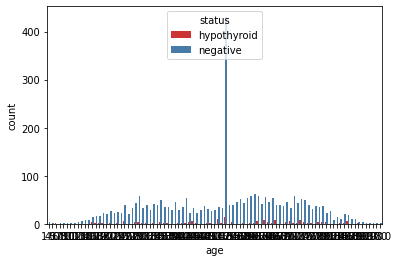

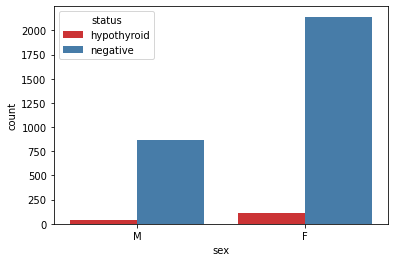

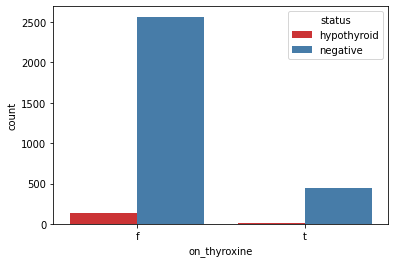

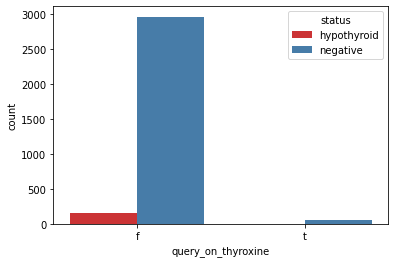

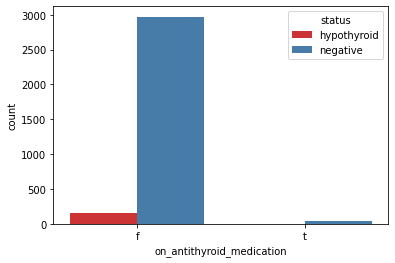

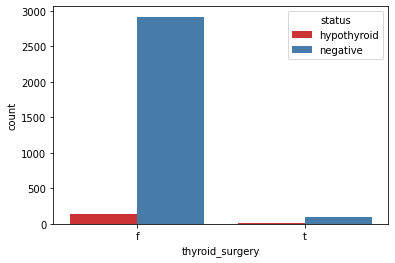

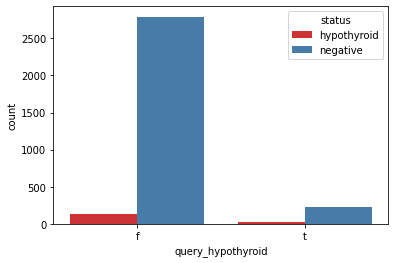

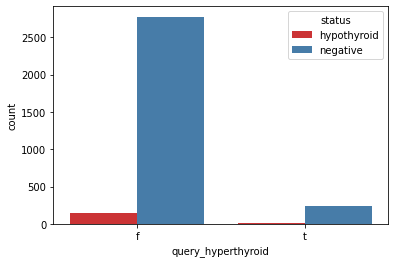

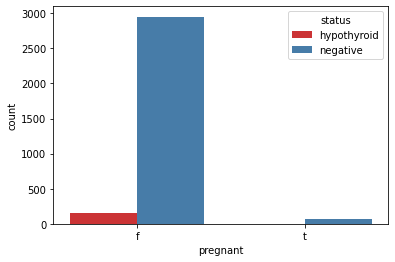

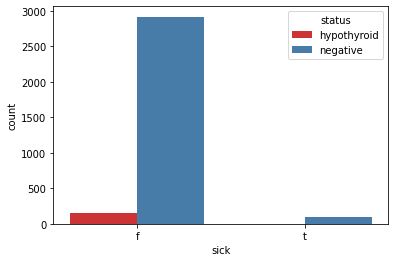

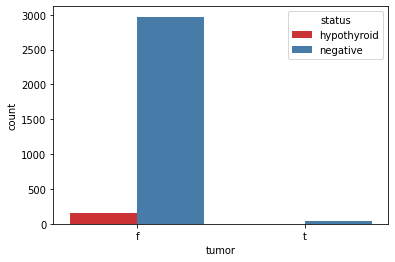

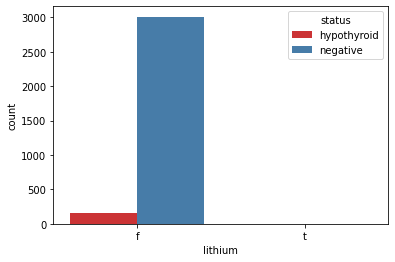

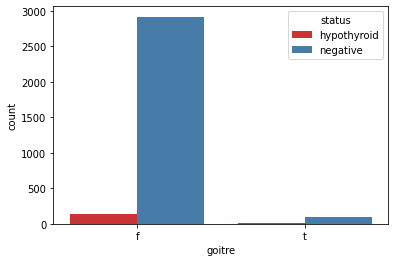

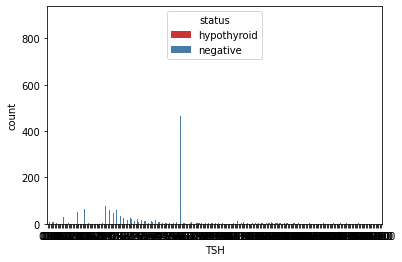

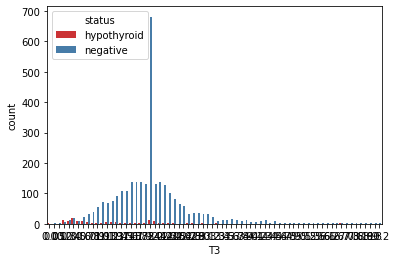

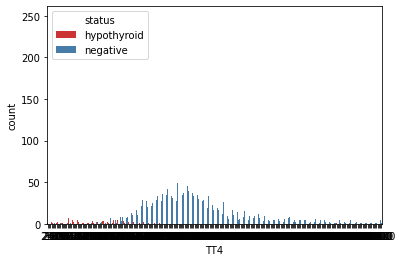

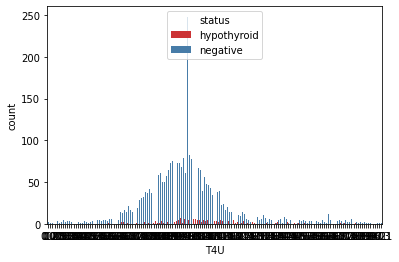

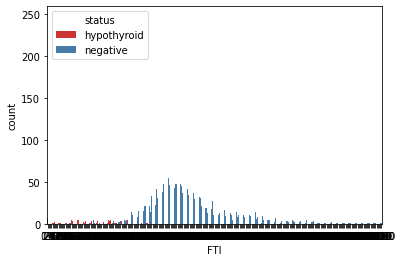

In [84]:
# Investigate all the features by our y

features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery',
       'query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH','T3','TT4'
           ,'T4U','FTI']


for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=hypothyroid_df, hue = 'status', palette="Set1")

# Machine Learning Models

# Preprocessing the data 

In [21]:
# Making categorical variables into numeric representation

hypothyroid_df = pd.get_dummies(hypothyroid_df, columns = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
                                                          'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant',
                                                          'sick', 'tumor', 'lithium', 'goitre'])
hypothyroid_df.head()

,status,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t
0,hypothyroid,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1,hypothyroid,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,hypothyroid,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3,hypothyroid,24.0,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
4,hypothyroid,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [25]:
# Preprocessing 
X=hypothyroid_df.drop(['status'],axis=1)
y=hypothyroid_df['status']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Decision Tree

In [28]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [34]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [36]:
#Calculating Feature Importance

for i, column in enumerate(hypothyroid_df.drop('status', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature age:, 0.000
Importance of feature TSH:, 0.210
Importance of feature T3:, 0.000
Importance of feature TT4:, 0.000
Importance of feature T4U:, 0.000
Importance of feature FTI:, 0.790
Importance of feature sex_F:, 0.000
Importance of feature sex_M:, 0.000
Importance of feature on_thyroxine_f:, 0.000
Importance of feature on_thyroxine_t:, 0.000
Importance of feature query_on_thyroxine_f:, 0.000
Importance of feature query_on_thyroxine_t:, 0.000
Importance of feature on_antithyroid_medication_f:, 0.000
Importance of feature on_antithyroid_medication_t:, 0.000
Importance of feature thyroid_surgery_f:, 0.000
Importance of feature thyroid_surgery_t:, 0.000
Importance of feature query_hypothyroid_f:, 0.000
Importance of feature query_hypothyroid_t:, 0.000
Importance of feature query_hyperthyroid_f:, 0.000
Importance of feature query_hyperthyroid_t:, 0.000
Importance of feature pregnant_f:, 0.000
Importance of feature pregnant_t:, 0.000
Importance of feature sick_f:, 0.000


,index,Variable,Feature Importance Score
0,5,FTI,0.790434
1,1,TSH,0.209566
2,0,age,0.000000
3,16,query_hypothyroid_f,0.000000
4,28,goitre_f,0.000000
5,27,lithium_t,0.000000
6,26,lithium_f,0.000000
7,25,tumor_t,0.000000
8,24,tumor_f,0.000000
9,23,sick_t,0.000000


In [37]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.9940711462450593
Testing Accuracy is:  0.9873617693522907


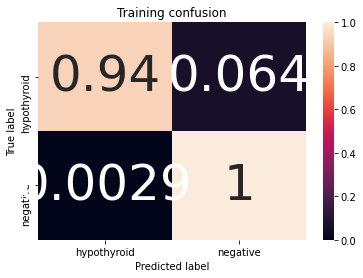

In [38]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

# Random Forest Classifier

In [214]:
hypothyroid_df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0


In [215]:
# Making categorical variables into numeric representation

# hypothyroid_df = pd.get_dummies(hypothyroid_df, columns = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
#                                                           'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant',
#                                                           'sick', 'tumor', 'lithium', 'goitre'])
# hypothyroid_df.head()

,status,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t
0,hypothyroid,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1,hypothyroid,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,hypothyroid,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3,hypothyroid,24.0,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
4,hypothyroid,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [216]:
# Preprocessing 
X=hypothyroid_df.drop(['status'],axis=1)
y=hypothyroid_df['status']

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [218]:
# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Training Accuracy is:  1.0
Testing Accuracy is:  0.9842022116903634


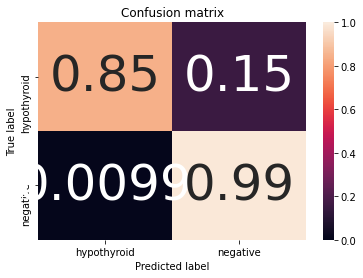

In [219]:
#Using a random forest with 100 Trees
rf = RandomForestClassifier(n_estimators=50, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

The algorithm predicted 81% of people with Hypothyroid correctly and 99% of people without Hypothyroid correctly.
The main objective of the model should be to increase the accuracy of predicting Hypothyroid. For this reason, Hyperparameter tuning can help increase this value.

Classification accuracy on test set with max features = 1 and max_depth = None: 0.981
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.959
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.959
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.959
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.957
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.983
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.964
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.978
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.978
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.983
Classification accuracy on test set with max features = log2 and max_depth = None: 0.984
Classification accuracy on test set with max features = log2

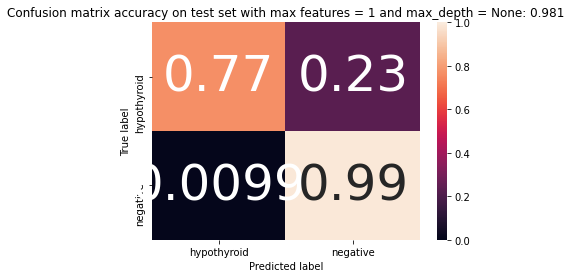

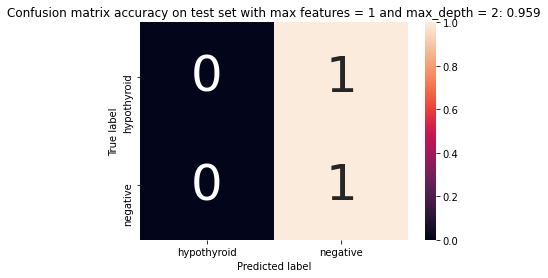

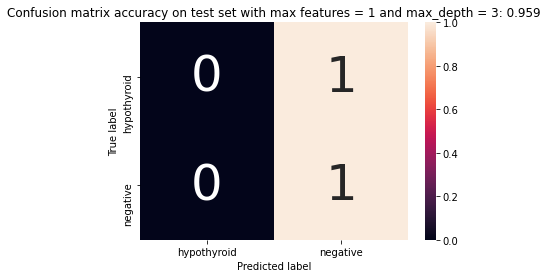

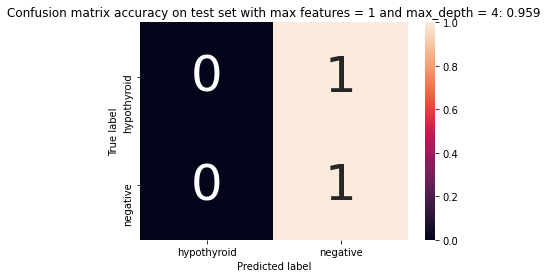

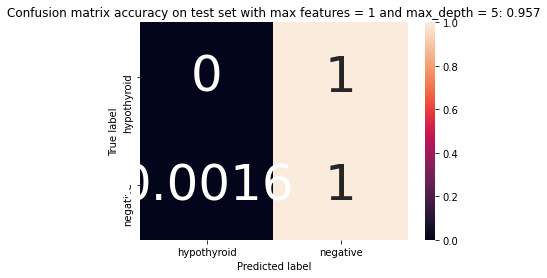

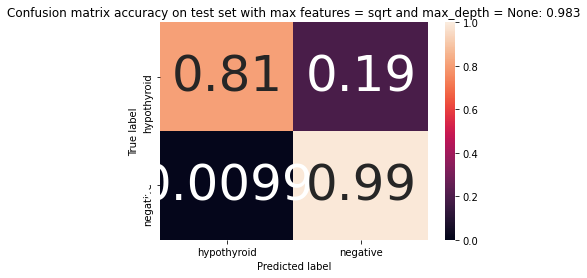

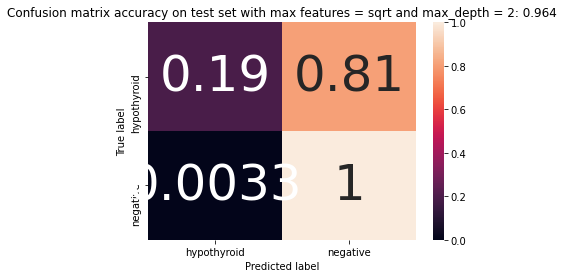

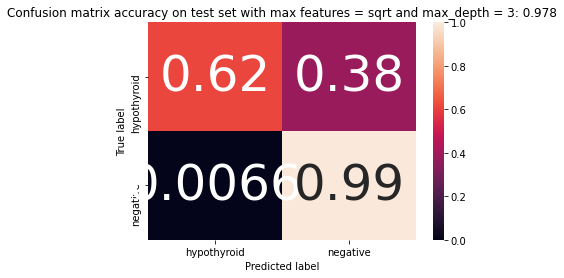

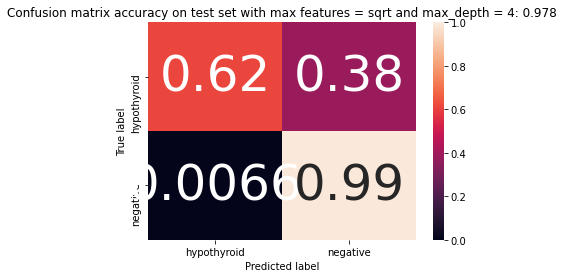

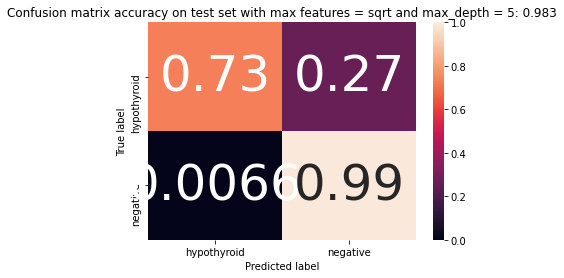

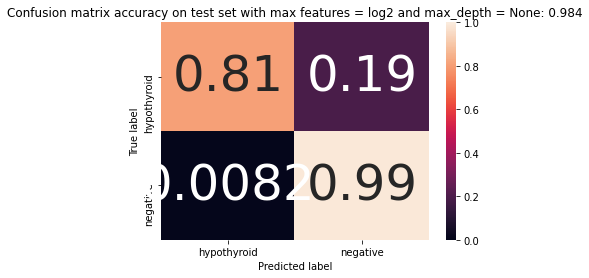

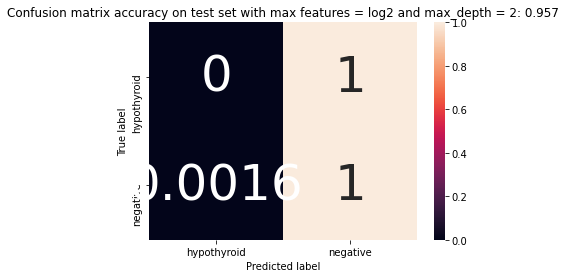

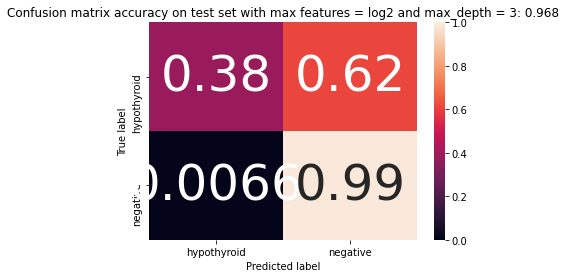

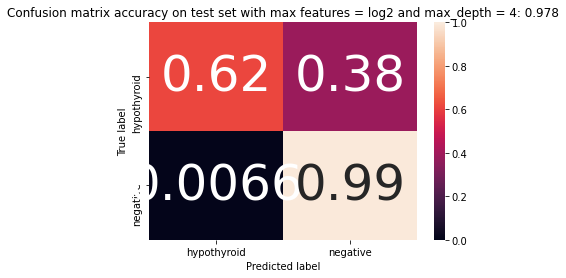

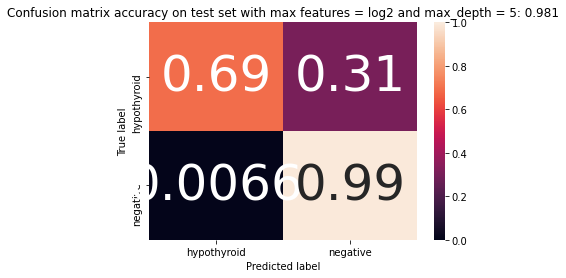

In [220]:
#Tuning the Hyperparameters to see if i can get better results

from itertools import product
n_estimators = 50
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]#To control Overfitting
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

After Hyperparameter Tuning, the best combination gave an accuracy of 81% for patients with predicting patients with hypothyroid correctly. Those are the parameters to use to get the best performance for this model.

# Support Vector Machines


In [39]:
# Importing Libraries

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

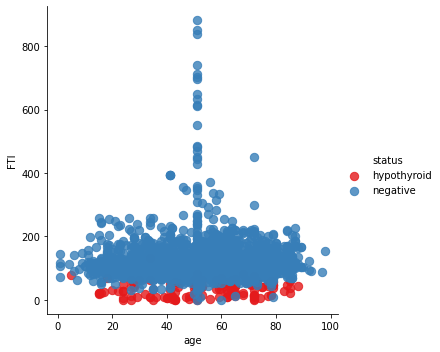

In [42]:
sns.lmplot('age','FTI', data= hypothyroid_df, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.show()

In [44]:
# Convert variable sick_status values of 0 and 1
hypothyroid_df.loc[(hypothyroid_df.status == 'hypothyroid'),'status']=1
hypothyroid_df.loc[(hypothyroid_df.status == 'negative'),'status']=0
hypothyroid_df.head()

,status,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t
0,1,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1,1,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,1,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3,1,24.0,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
4,1,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [48]:
# splitting the data into train and test data
# Removing the target column
# Preprocessing 
X=hypothyroid_df.drop(['status'],axis=1)
y=hypothyroid_df['status']
# Convert the data type for 'Class' column from object to category
y = y.astype('category')

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(X)
X = pca.transform(X)
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Fitting the model: Polymomial function

In [49]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [51]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9747235387045814
[[601   6]
 [ 10  16]]


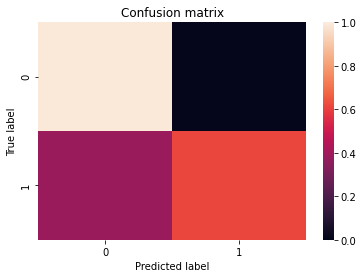

In [59]:
# Confusion Matrix
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm)

Fitting the model: Radial basis function (rbf)

In [60]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [63]:
# Model Evaluation
print( "The accuracy Score is : ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

The accuracy Score is :  0.9747235387045814
[[601   6]
 [ 10  16]]
